# Análisis de una solución de la ecuación del calor

La solución a la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones:
$$u_x(0,t) = u_x(1,t)=0, \;\;\; t>0$$
Y su condición inicial:
$$u(x,0)=k(x),\;\;\;0<x<1$$
$$k(x)=-2 ,\;\;\;0<x\leq 1/2 $$
$$k(x)=0 ,\;\;\;1/2<x<1 $$
Dada en términos de la serie de Fourier:
$$u(x,t)=-1-\frac{4}{\pi}\sum_{n=1}^{\infty} \frac{1}{n}  \sin(\frac{n\pi}{2} )cos(n\pi x)e^{-(n\pi)^2 t}.$$

El problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
         y[i]=-2
    return y
def recta2(z):
    s=zeros(len(z))
    for p in range(len(z)):
         s[p]=0
    return s

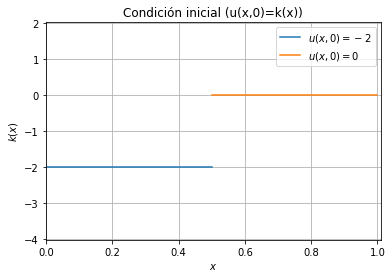

In [ ]:
x = linspace(0,0.5,1000)
z = linspace(0.5,1,1000)
k = recta(x)
k1 = recta2(z)
plot(x,k,label='$u(x,0)=-2$')
plot(z,k1,label='$u(x,0)=0$')
plt.xlabel('$x$'); plt.ylabel('$k(x)$'); 
plt.title("Condición inicial (u(x,0)=k(x))")
xlim([0,1.01]),ylim([-4.01,2.01]),grid(),legend()
show()

Usamos una serie de Fourier y para aproximar la condición inicial $u(x,0)=k(x)=x$.

In [ ]:
def u_0(x,N=50): # N es el número de armónicos
    k = zeros(len(x))
    for n in range(1,N):
        k += (-1)*(4/(n*pi))*sin(n*pi/2)*cos(n*pi*x)
    return k-1
def u_0(z,N=50): # N es el número de armónicos
    k = zeros(len(z))
    for n in range(1,N):
        k += (-1)*(4/(n*pi))*sin(n*pi/2)*cos(n*pi*z)
    return k-1

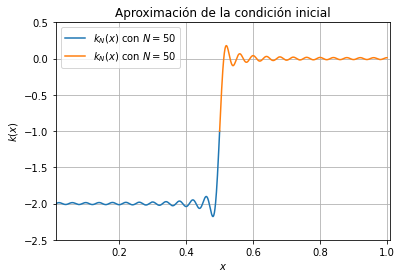

In [ ]:
k_n = u_0(x)
g_n = u_0(z)
plot(x,k_n,label='$k_N(x)$ con $N=50$')
plot(z,g_n,label='$k_N(x)$ con $N=50$')
plt.xlabel('$x$'); plt.ylabel('$k(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([0.01,1.01]),ylim([-2.50,0.50]),grid(),legend()
show()

Aproximación para diferentes cantidades de armónicos.

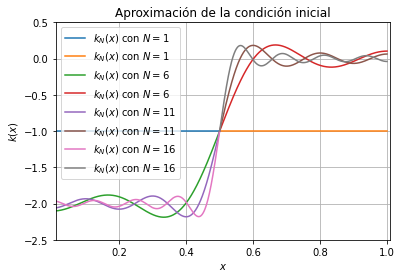

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$k_N(x)$ con $N=%d$' %i)
    plot(z,u_0(z,i),label='$k_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$k(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([0.01,1.01]),ylim([-2.50,0.50]),grid(),legend()
show()

Agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    k = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            k[:,i] += (-1)*(4/(n*pi))*sin(n*pi/2)*cos(n*pi*x)*exp(-n**2*pi**2*t[i])
    return k-1

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$k(x)$'); 
plt.title("Aproximación de condición inicial")
xlim([-0.01,1.01]),ylim([-2.50,0.50]),grid(),legend()222
show()

SyntaxError: ignored

Para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

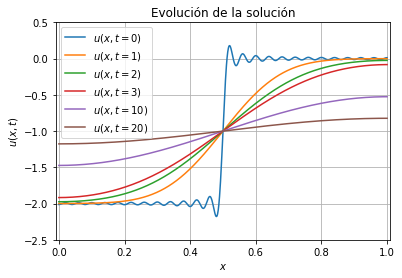

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.50,0.50]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

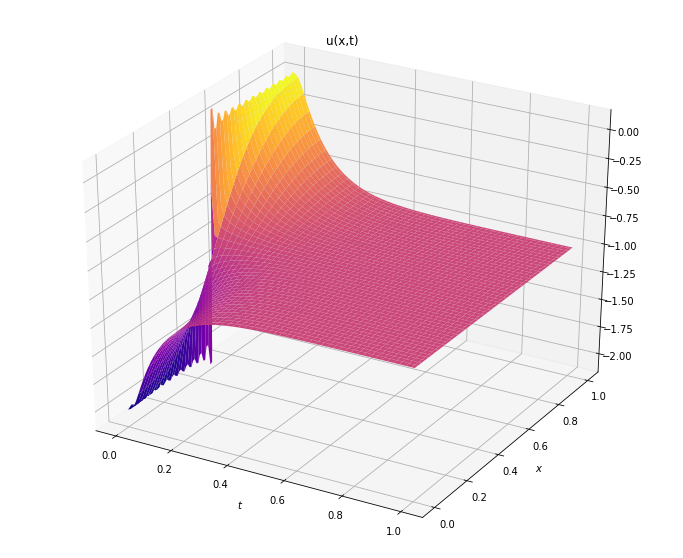

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma");